In [161]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from google.colab import files   
uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
df

Saving train.csv to train.csv


,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.00,NaN,2.0,1.0,3.0,NaN,NaN,NaN,150000.0,NaN,NaN,NaN,NaN,NaN,118845.2,50000.0,NaN,51205.47,50259.00,3.0,1.0,50000.0,24740.22,114252.00,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.00,2806.24,11.0,14.0,11.0,1.0,NaN,6.0,176000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,159050.76,169812.00,20.0,9.0,70000.0,103102.85,174606.00,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21660.00,1607.0,1168.00,355.00,6.0,9.0,6.0,3.0,2.0,14.0,65000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51484.55,38942.00,16.0,4.0,11700.0,15283.00,23051.00,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.50,NaN,9.0,6.0,6.0,NaN,NaN,NaN,600000.0,NaN,NaN,NaN,NaN,NaN,132442.0,NaN,NaN,1981.07,2294.00,2.0,1.0,2000.0,19361.24,19529.00,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.00,NaN,2.0,7.0,9.0,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6462.00,10271.00,6.0,1.0,10000.0,7461.00,3194.00,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43723,saving,M,43,583,45275.20,NaN,48901.62,NaN,47267.41,NaN,19.0,10.0,10.0,NaN,NaN,NaN,140000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,53850.29,81999.00,5.0,4.0,46000.0,77104.72,49629.00,2.0,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,NaN,11192.56,3691
32816,32511,current,M,33,623,1627.00,NaN,3494.54,1393.0,3242.00,1304.00,2.0,2.0,27.0,NaN,2.0,7.0,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24530.25,24878.39,13.0,2.0,24637.0,14646.75,153096.75,3.0,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,NaN,3702.50,4275
32817,5192,current,M,25,245,22409.00,2538.00,41241.00,639.0,2087.00,1215.00,NaN,56.0,18.0,12.0,2.0,12.0,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24704.56,12635.00,25.0,1.0,12607.0,394.00,17173.00,1.0,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,NaN,0.00,1677
32818,12172,current,M,33,535,9877.30,373.00,9018.22,NaN,2804.00,NaN,17.0,15.0,24.0,3.0,NaN,1.0,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60841.56,97118.36,14.0,10.0,45751.0,48230.35,12248.00,3.0,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,NaN,1716.37,846


In [162]:
import seaborn as sns

In [163]:
df.shape

(32820, 44)

In [164]:
df.columns

Index(['id', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active', 'cc_cons'],
      dtype='object')

In [165]:
print(df.describe())
print(df.info())

                 id           age  ...    emi_active        cc_cons
count  32820.000000  32820.000000  ...  3.282000e+04   32820.000000
mean   23450.929616     35.951676  ...  9.567620e+03    6824.631840
std    13495.676061      8.529949  ...  2.616736e+05   12459.140593
min        0.000000     22.000000  ...  0.000000e+00       0.000000
25%    11824.750000     31.000000  ...  0.000000e+00    1285.000000
50%    23478.500000     34.000000  ...  1.510650e+02    3141.000000
75%    35096.250000     39.000000  ...  4.176868e+03    7349.250000
max    46886.000000    224.000000  ...  4.468722e+07  408630.000000

[8 rows x 41 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32820 non-null  int64  
 1   account_type           32820 non-null  object 
 2   gender                 32820 non-null  obje

In [166]:

cols = ['personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq']
df[cols] = df[cols].astype('str')



In [167]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)

df[categorical].describe()


Index(['account_type', 'gender', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'loan_enq'],
      dtype='object')


,account_type,gender,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,loan_enq
count,32820,32820,32820,32820,32820,32820,32820
unique,2,2,2,2,2,2,2
top,current,M,nan,nan,nan,nan,nan
freq,25825,28106,30078,31974,29937,31195,32211


In [168]:
missing = [(c, df[c].isna().mean()*100) for c in df]
missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
missing = missing[missing.percentage > 0]
display(missing.sort_values("percentage", ascending=False))

,column_name,percentage
25,investment_4,98.762949
24,investment_3,95.941499
22,investment_1,95.655088
23,investment_2,92.876295
10,dc_cons_jun,64.890311
6,dc_cons_apr,58.049970
14,dc_count_apr,58.049970
15,dc_count_may,52.830591
8,dc_cons_may,52.830591
16,dc_count_jun,47.218160


<BarContainer object of 44 artists>

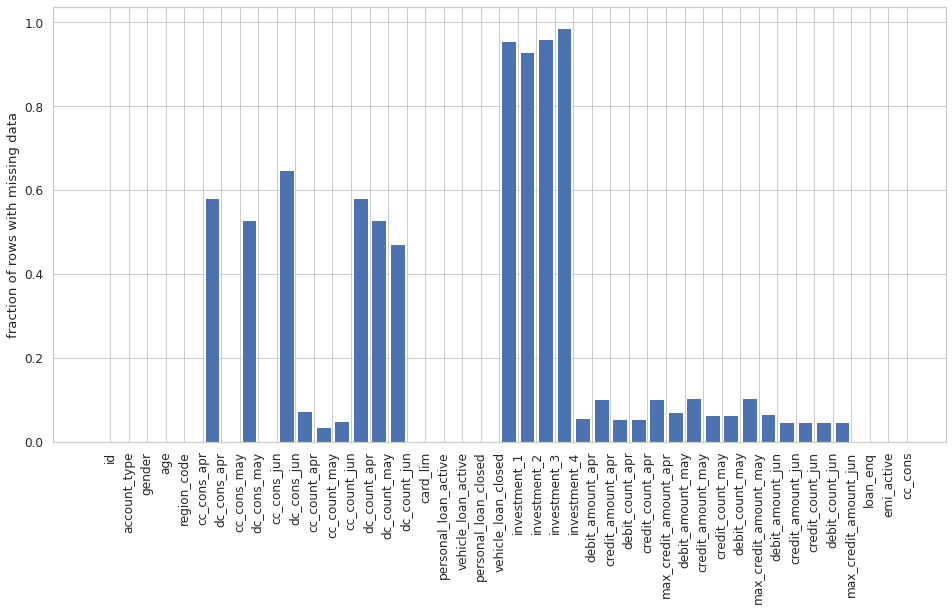

In [169]:
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [170]:
categorical_columns = []
numeric_columns = []
for c in df.columns:
    if df[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

#create two DataFrames, one for each data type
data_numeric = df[numeric_columns]
data_categorical = pd.DataFrame(df[categorical_columns])


from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_numeric = pd.DataFrame(imputer.fit_transform(data_numeric), columns = data_numeric.columns) #only apply imputer to numeric columns

#join the two masked dataframes back together
data_joined = pd.concat([data_numeric, data_categorical], axis = 1)

In [171]:

data_joined.loan_enq = data_joined.loan_enq.replace({"nan": "N"})
data_joined = data_joined.replace(['nan'],'0')

In [172]:
data_joined.isnull().sum() 

id                       0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
emi_active               0
cc_cons                  0
a

In [173]:
data_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32820 non-null  float64
 1   age                    32820 non-null  float64
 2   region_code            32820 non-null  float64
 3   cc_cons_apr            32820 non-null  float64
 4   dc_cons_apr            32820 non-null  float64
 5   cc_cons_may            32820 non-null  float64
 6   dc_cons_may            32820 non-null  float64
 7   cc_cons_jun            32820 non-null  float64
 8   dc_cons_jun            32820 non-null  float64
 9   cc_count_apr           32820 non-null  float64
 10  cc_count_may           32820 non-null  float64
 11  cc_count_jun           32820 non-null  float64
 12  dc_count_apr           32820 non-null  float64
 13  dc_count_may           32820 non-null  float64
 14  dc_count_jun           32820 non-null  float64
 15  ca

In [174]:
cols = ['id','age','region_code','cc_count_apr','cc_count_may','cc_count_jun','dc_count_apr','dc_count_may','dc_count_jun','card_lim',
'credit_count_may','debit_count_may','debit_count_apr','debit_count_jun','credit_count_apr','credit_count_jun']
data_joined[cols] = data_joined[cols].astype('int64')


In [175]:
data_joined

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type,gender,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,loan_enq
0,23334,63,305,7695.00,5727.615837,479.00,5635.506904,622.00,4666.71342,2,1,3,5,6,7,150000,811511.814383,118845.200000,50000.000000,4972.642169,51205.47,50259.00,3,1,50000.0,24740.22,114252.00,3,2,45000.0,20215.85,1279.37,7,3,470.0,0.00,435.0,saving,M,0,0,0,0,N
1,20329,33,326,52702.00,988.720000,29873.00,5635.506904,1087.00,2806.24000,11,14,11,1,6,6,176000,811511.814383,176545.929358,39757.860147,4972.642169,159050.76,169812.00,20,9,70000.0,103102.85,174606.00,6,10,150000.0,122037.66,55390.00,8,19,27000.0,4963.33,1921.0,current,M,0,0,1.0,0,N
2,17679,44,264,10800.49,3215.520000,21660.00,1607.000000,1168.00,355.00000,6,9,6,3,2,14,65000,811511.814383,176545.929358,39757.860147,4972.642169,51484.55,38942.00,16,4,11700.0,15283.00,23051.00,2,7,13800.0,46827.00,29297.91,6,19,20800.0,0.00,1970.0,current,M,0,0,0,0,N
3,16428,44,233,20936.00,5727.615837,2094.00,5635.506904,11778.50,4666.71342,9,6,6,5,6,7,600000,811511.814383,132442.000000,39757.860147,4972.642169,1981.07,2294.00,2,1,2000.0,19361.24,19529.00,1,1,19300.0,5426.55,7544.00,3,1,5300.0,1238.18,21579.0,saving,M,0,0,0,0,N
4,18721,35,324,1183.83,5727.615837,3656.29,5635.506904,945.00,4666.71342,2,7,9,5,6,7,100000,811511.814383,176545.929358,39757.860147,4972.642169,6462.00,10271.00,6,1,10000.0,7461.00,3194.00,2,3,3000.0,26178.05,53483.00,4,4,45000.0,0.00,1814.0,saving,F,0,0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43723,43,583,45275.20,5727.615837,48901.62,5635.506904,47267.41,4666.71342,19,10,10,5,6,7,140000,811511.814383,176545.929358,39757.860147,4972.642169,53850.29,81999.00,5,4,46000.0,77104.72,49629.00,2,5,46500.0,45065.00,57403.00,4,9,48000.0,11192.56,3691.0,saving,M,0,0,1.0,0,N
32816,32511,33,623,1627.00,5727.615837,3494.54,1393.000000,3242.00,1304.00000,2,2,27,5,2,7,30000,811511.814383,176545.929358,39757.860147,4972.642169,24530.25,24878.39,13,2,24637.0,14646.75,153096.75,3,9,136503.0,124930.00,17209.93,3,20,16403.0,3702.50,4275.0,current,M,0,0,0,0,N
32817,5192,25,245,22409.00,2538.000000,41241.00,639.000000,2087.00,1215.00000,9,56,18,12,2,12,40000,811511.814383,176545.929358,39757.860147,4972.642169,24704.56,12635.00,25,1,12607.0,394.00,17173.00,1,2,16923.0,34993.98,25289.98,6,20,16870.0,0.00,1677.0,current,M,0,0,0,0,N
32818,12172,33,535,9877.30,373.000000,9018.22,5635.506904,2804.00,4666.71342,17,15,24,3,6,1,80000,811511.814383,176545.929358,39757.860147,4972.642169,60841.56,97118.36,14,10,45751.0,48230.35,12248.00,3,4,6500.0,44352.21,44302.36,9,6,19087.0,1716.37,846.0,current,M,0,0,0,0,N


In [176]:
data_joined.personal_loan_active = data_joined.personal_loan_active.replace({"1.0": "Yes","0":"No"})
data_joined.vehicle_loan_active = data_joined.vehicle_loan_active.replace({"1.0": "Yes","0":"No"})
data_joined.personal_loan_closed = data_joined.personal_loan_closed.replace({"1.0": "Yes","0":"No"})
data_joined.vehicle_loan_closed = data_joined.vehicle_loan_closed.replace({"1.0": "Yes","0":"No"})


In [177]:
data_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32820 entries, 0 to 32819
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32820 non-null  int64  
 1   age                    32820 non-null  int64  
 2   region_code            32820 non-null  int64  
 3   cc_cons_apr            32820 non-null  float64
 4   dc_cons_apr            32820 non-null  float64
 5   cc_cons_may            32820 non-null  float64
 6   dc_cons_may            32820 non-null  float64
 7   cc_cons_jun            32820 non-null  float64
 8   dc_cons_jun            32820 non-null  float64
 9   cc_count_apr           32820 non-null  int64  
 10  cc_count_may           32820 non-null  int64  
 11  cc_count_jun           32820 non-null  int64  
 12  dc_count_apr           32820 non-null  int64  
 13  dc_count_may           32820 non-null  int64  
 14  dc_count_jun           32820 non-null  int64  
 15  ca

In [178]:
data_joined.describe()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,3.282000e+04,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,32820.000000,3.282000e+04,3.282000e+04,3.282000e+04,32820.000000,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,3.282000e+04,32820.000000,32820.000000,3.282000e+04,3.282000e+04,32820.000000
mean,23450.929616,35.951676,554.854327,16661.907189,5727.615837,1.441190e+04,5635.506904,9031.179889,4666.713420,9.150335,9.521207,12.284217,5.107770,6.126234,7.473461,121553.749452,8.115118e+05,1.765459e+05,3.975786e+04,4972.642169,7.002974e+04,7.541190e+04,14.839762,3.749360,4.647113e+04,6.709618e+04,7.959347e+04,4.081840,13.875807,4.969688e+04,7.759673e+04,7.583531e+04,5.731993,16.001371,4.474355e+04,9.567620e+03,6824.631840
std,13495.676061,8.529949,188.220317,25138.435416,7476.795200,2.363688e+04,9650.983116,15720.847307,6082.305708,10.388927,9.477910,11.427147,3.983282,5.070279,6.697109,123002.957414,9.207681e+05,1.174958e+05,1.697830e+04,678.434365,1.593964e+05,1.685425e+05,11.276741,3.392404,1.120405e+05,1.789109e+05,1.918855e+05,3.724444,11.090186,1.218650e+05,3.033277e+05,2.989925e+05,4.596735,13.055237,1.186464e+05,2.616736e+05,12459.140593
min,0.000000,22.000000,123.000000,233.970000,10.010000,1.030000e+02,20.000000,51.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000e-02,3.000000e+00,0.000000e+00,-12179.000000,4.010000e+00,3.432000e+01,0.000000,0.000000,1.800000e-01,1.500000e-01,1.061000e+01,0.000000,0.000000,1.500000e-01,5.230000e+00,1.188000e+01,0.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,11824.750000,31.000000,425.000000,3712.000000,3295.682500,2.983298e+03,2367.750000,1637.875000,3953.750000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,45000.000000,8.115118e+05,1.765459e+05,3.975786e+04,4972.642169,2.334516e+04,2.728763e+04,7.000000,2.000000,1.920000e+04,2.130144e+04,2.654400e+04,2.000000,6.000000,1.989472e+04,2.635132e+04,2.405212e+04,3.000000,7.000000,1.668150e+04,0.000000e+00,1285.000000
50%,23478.500000,34.000000,575.000000,8912.790000,5727.615837,7.332298e+03,5635.506904,4147.487500,4666.713420,7.000000,7.000000,10.000000,5.000000,6.000000,7.000000,75000.000000,8.115118e+05,1.765459e+05,3.975786e+04,4972.642169,4.394296e+04,4.945519e+04,13.000000,3.000000,3.060350e+04,4.191051e+04,5.194600e+04,3.000000,12.000000,3.388250e+04,4.965915e+04,4.545429e+04,5.000000,14.000000,2.837750e+04,1.510650e+02,3141.000000
75%,35096.250000,39.000000,683.000000,19932.060000,5727.615837,1.684785e+04,5635.506904,10126.250000,4666.713420,12.000000,13.000000,16.000000,5.000000,6.000000,7.000000,145000.000000,8.115118e+05,1.765459e+05,3.975786e+04,4972.642169,7.207154e+04,7.541190e+04,20.000000,5.000000,4.647113e+04,6.946070e+04,8.123050e+04,5.000000,18.000000,4.969688e+04,7.978210e+04,7.769936e+04,7.000000,21.000000,4.506050e+04,4.176868e+03,7349.250000
max,46886.000000,224.000000,977.000000,804712.580000,366223.160000,1.117246e+06,911223.490000,382914.100000,301991.940000,1012.000000,601.000000,653.000000,82.000000,97.000000,104.000000,1000000.000000,8.445222e+07,1.360284e+07,1.650000e+06,35346.000000,1.353571e+07,1.310058e+07,147.000000,78.000000,1.202915e+07,2.230122e+07,2.246350e+07,71.000000,171.000000,1.285103e+07,3.986881e+07,3.933931e+07,117.000000,164.000000,1.293238e+07

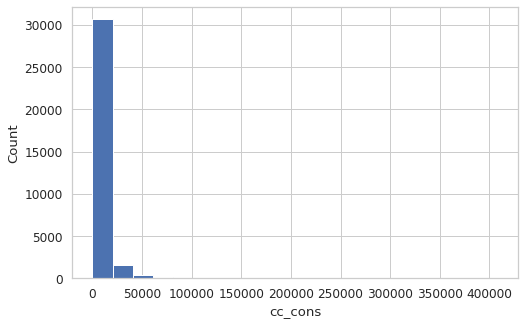

In [179]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data_joined['cc_cons'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='cc_cons', ylabel='Count');

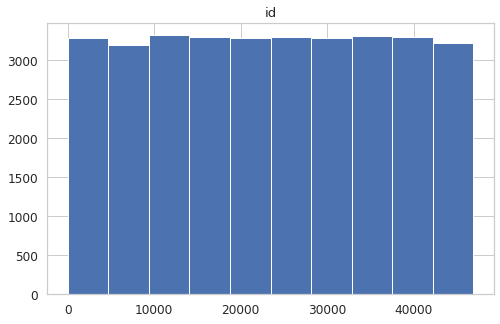

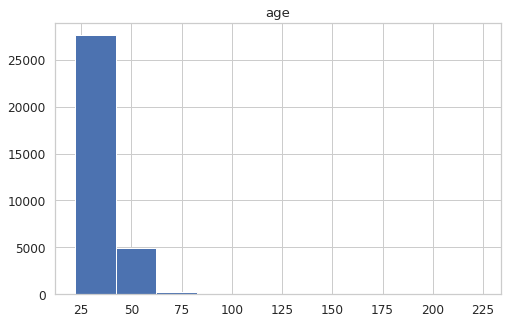

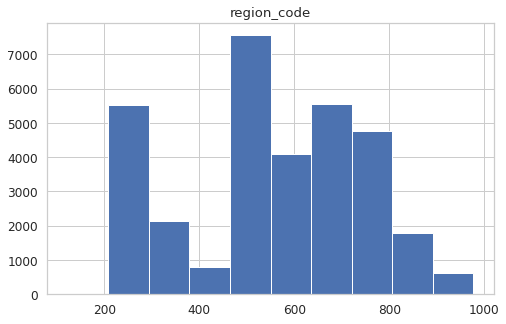

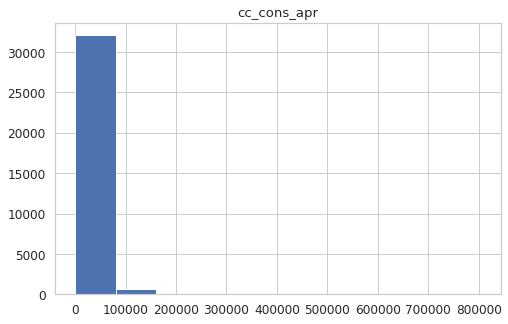

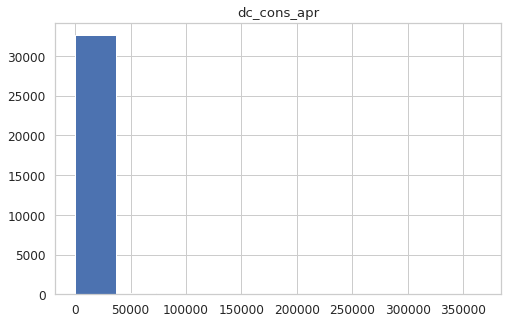

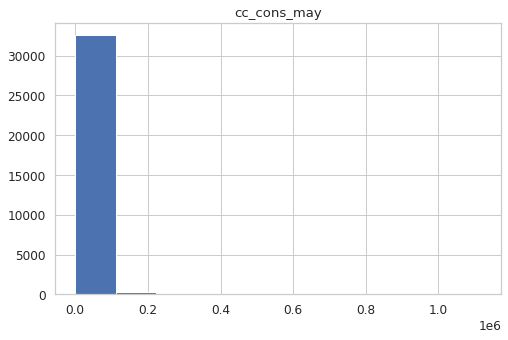

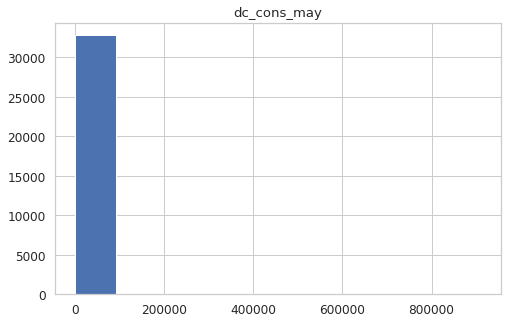

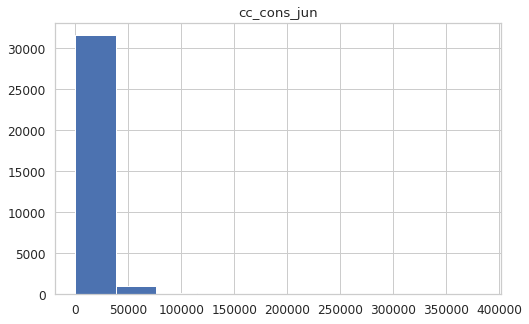

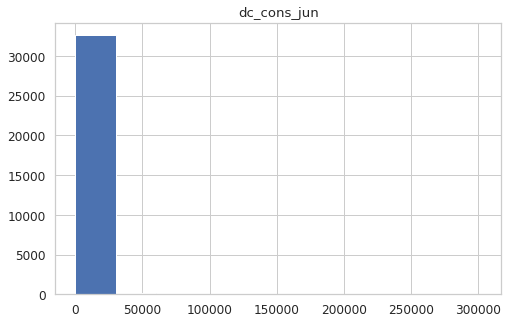

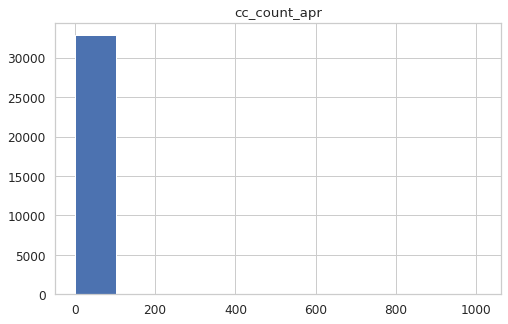

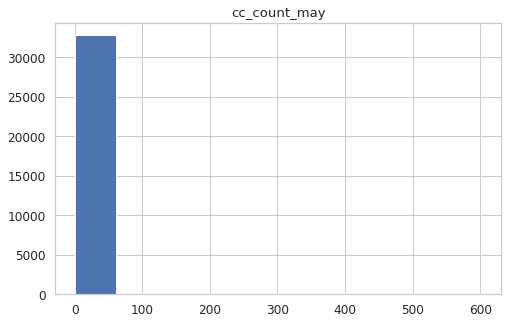

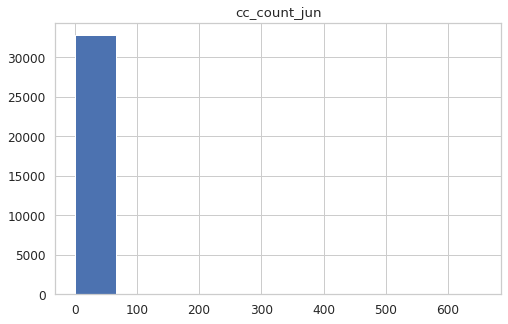

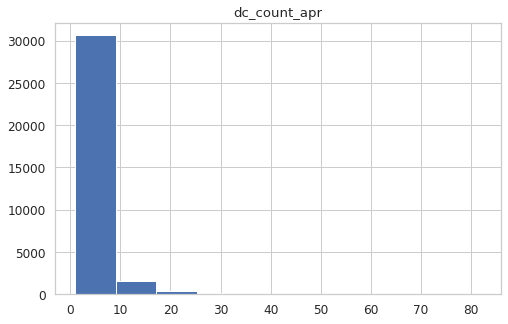

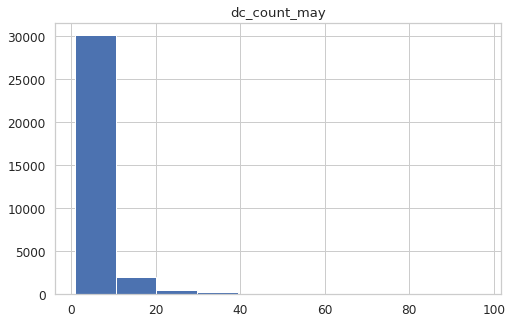

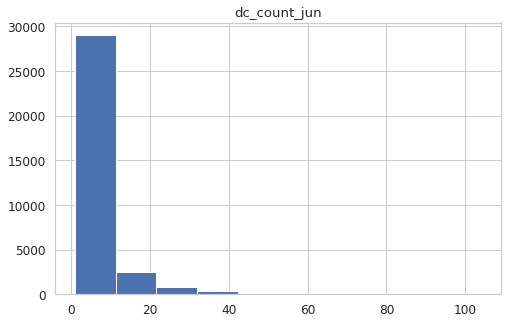

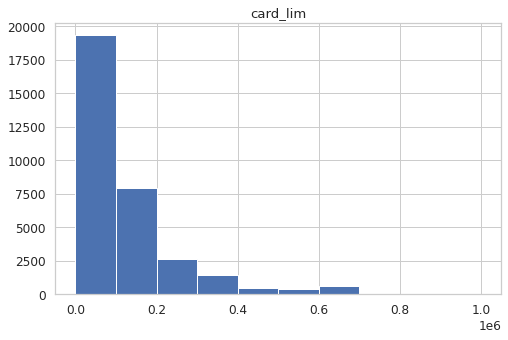

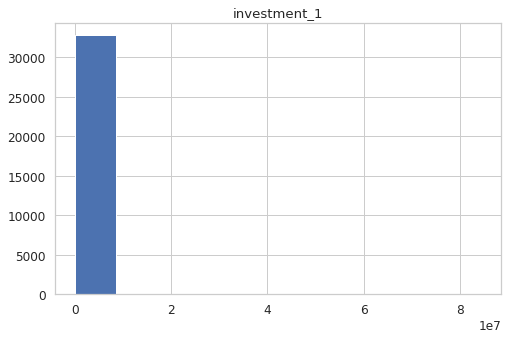

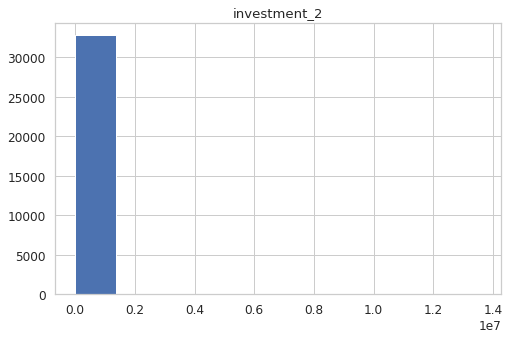

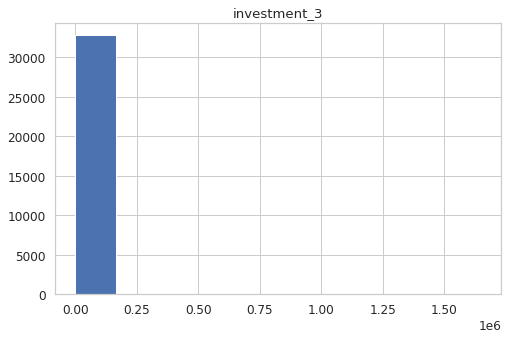

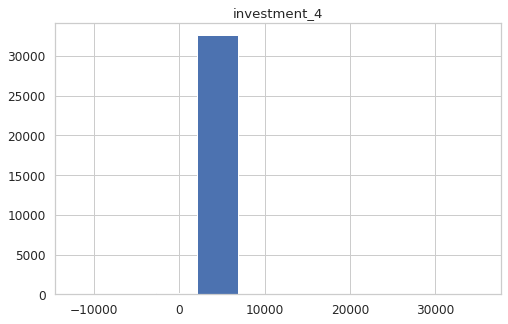

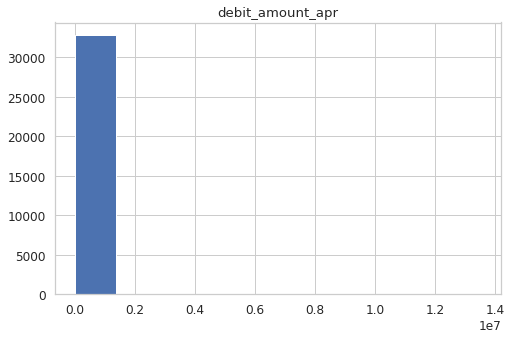

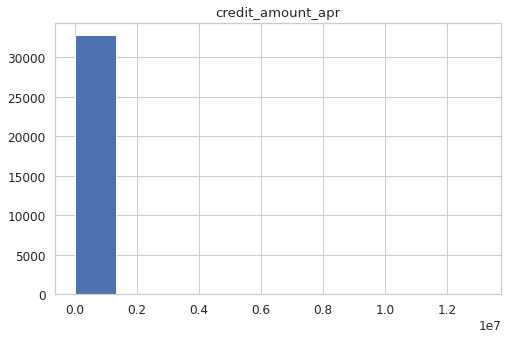

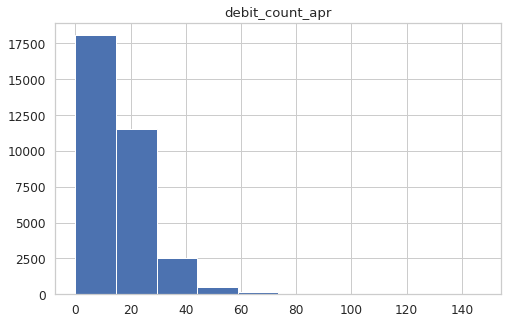

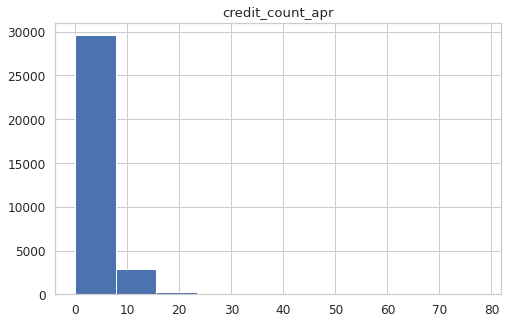

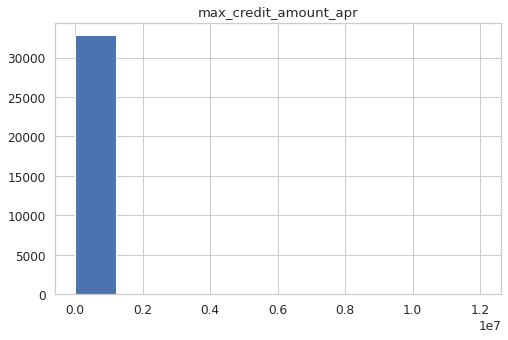

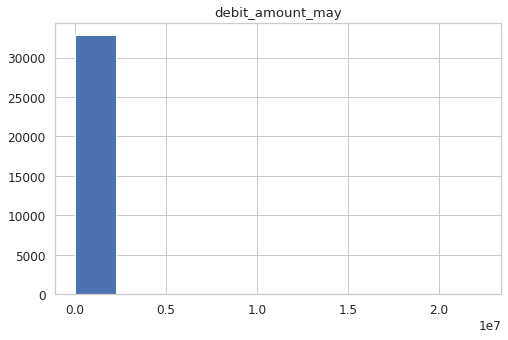

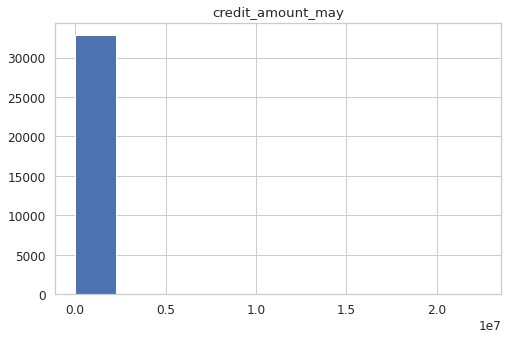

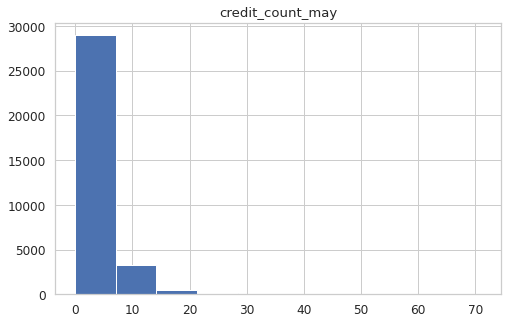

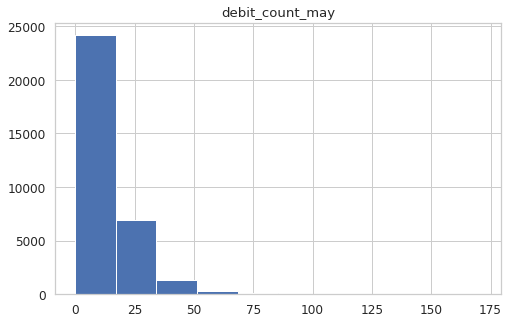

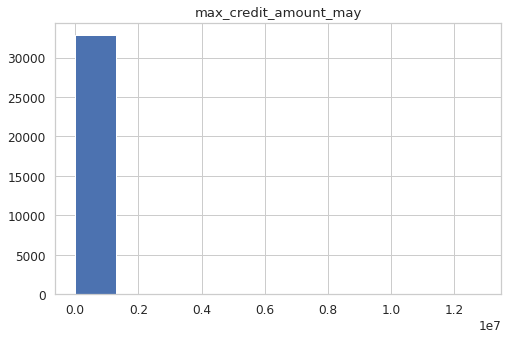

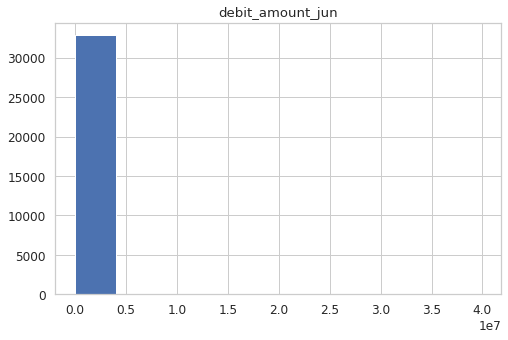

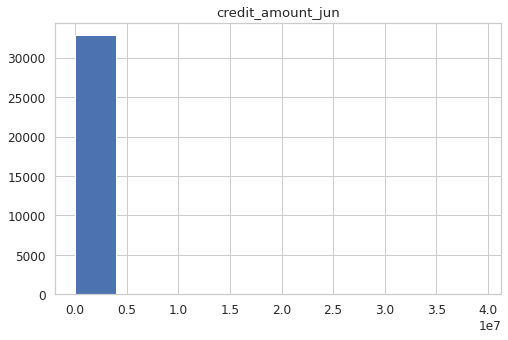

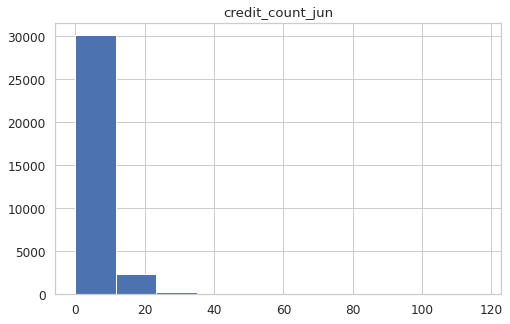

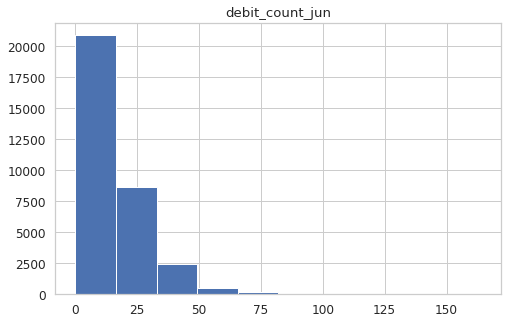

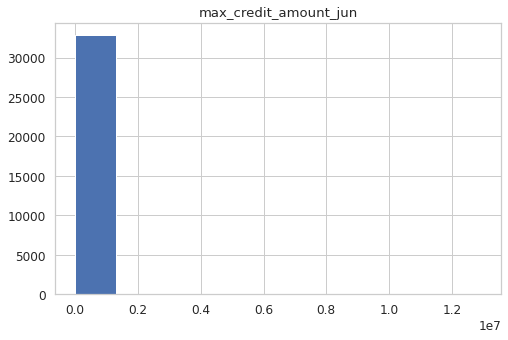

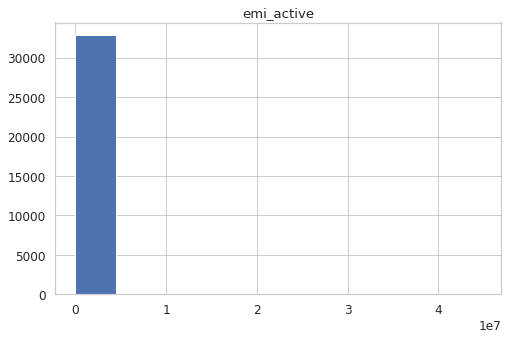

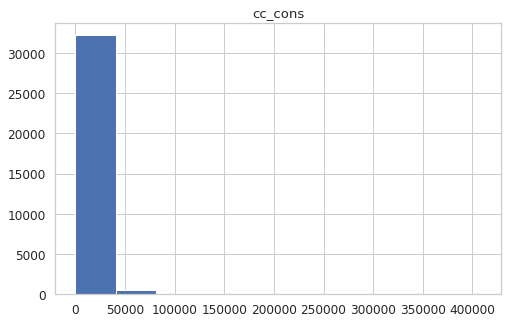

In [180]:
for col in data_numeric.columns: 
    try:      
        data_numeric[col] = pd.to_numeric(data_numeric[col]) 
        data_numeric.hist(column=col)
    except ValueError:
        print('This column can not be represented as a histogram')

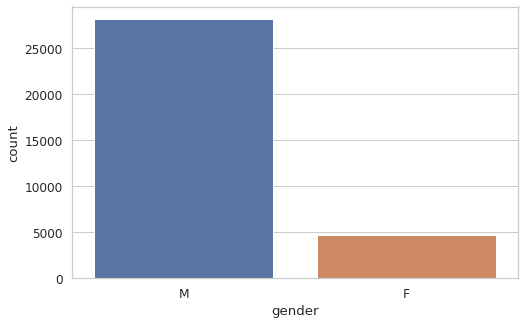

In [181]:
#categorical data analysis
sns.countplot(x ='gender', data = data_joined)

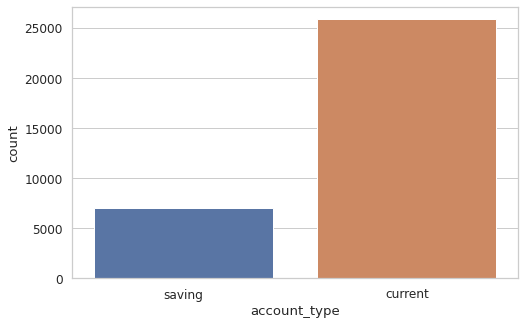

In [182]:
sns.countplot(x ='account_type', data = data_joined)

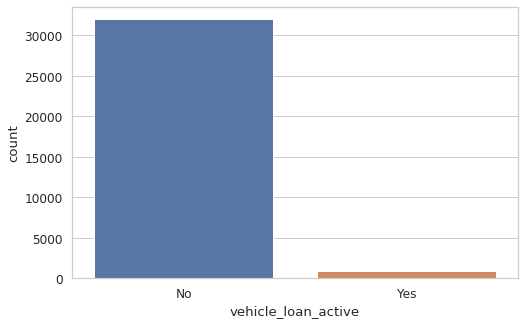

In [183]:
sns.countplot(x ='vehicle_loan_active', data = data_joined)

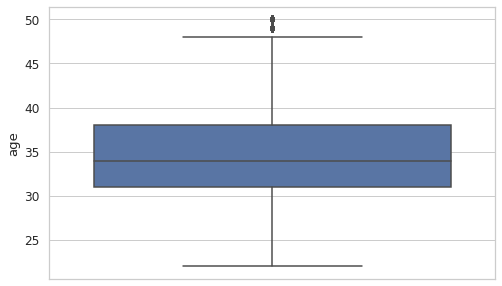

In [188]:
#Outlier detection

ax = sns.boxplot(data_joined.age, orient='v')

In [185]:
#Outlier Detection

Q1 = data_joined.age.quantile(0.25)
Q3 = data_joined.age.quantile(0.75)
IQR = Q3 - Q1
print('Inter Quartile Range:',IQR)

#Upper and Lower Thresholds for IQR Method
lower_threshold  = Q1 - 1.5 * IQR
upper_threshold  = Q3 + 1.5 * IQR


print('Index Positions of Outliers in the column', (data_joined.age < (lower_threshold)) |(data_joined.age > (upper_threshold)))
print('Number of Outliers presented in the column', sum((data_joined.age < (lower_threshold)) |(data_joined.age > (upper_threshold))))

Inter Quartile Range: 8.0
Index Positions of Outliers in the column 0         True
1        False
2        False
3        False
4        False
         ...  
32815    False
32816    False
32817    False
32818    False
32819    False
Name: age, Length: 32820, dtype: bool
Number of Outliers presented in the column 1553


In [186]:
#Outlier treatment


median_value = np.median(data_joined.age)
data_joined.loc[((data_joined.age>=upper_threshold) | (data_joined.age<=lower_threshold)), 'age'] = median_value

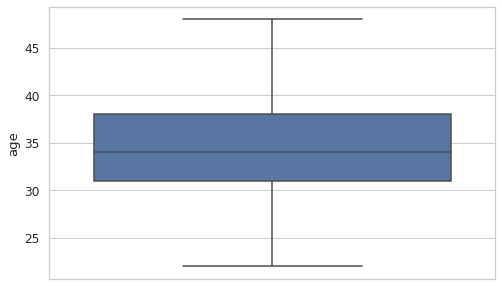

In [160]:
ax = sns.boxplot(data_joined.age, orient='v')

In [189]:
#Outlier Detection

Q1 = data_joined.cc_cons.quantile(0.25)
Q3 = data_joined.cc_cons.quantile(0.75)
IQR = Q3 - Q1
print('Inter Quartile Range:',IQR)

#Upper and Lower Thresholds for IQR Method
lower_threshold  = Q1 - 1.5 * IQR
upper_threshold  = Q3 + 1.5 * IQR


print('Index Positions of Outliers in the column', (data_joined.cc_cons < (lower_threshold)) |(data_joined.cc_cons > (upper_threshold)))
print('Number of Outliers presented in the column', sum((data_joined.cc_cons < (lower_threshold)) |(data_joined.cc_cons > (upper_threshold))))

Inter Quartile Range: 6064.25
Index Positions of Outliers in the column 0        False
1        False
2        False
3         True
4        False
         ...  
32815    False
32816    False
32817    False
32818    False
32819    False
Name: cc_cons, Length: 32820, dtype: bool
Number of Outliers presented in the column 3107


In [197]:
#Outlier Detection

Q1 = data_joined.cc_cons.quantile(0.25)
Q3 = data_joined.cc_cons.quantile(0.75)
IQR = Q3 - Q1
print('Inter Quartile Range:',IQR)

#Upper and Lower Thresholds for IQR Method
lower_threshold  = Q1 - 1.5 * IQR
upper_threshold  = Q3 + 1.5 * IQR


print('Index Positions of Outliers in the column', (data_joined.cc_cons < (lower_threshold)) |(data_joined.cc_cons > (upper_threshold)))
print('Number of Outliers presented in the column', sum((data_joined.cc_cons < (lower_threshold)) |(data_joined.cc_cons > (upper_threshold))))

Inter Quartile Range: 6064.25
Index Positions of Outliers in the column 0        False
1        False
2        False
3         True
4        False
         ...  
32815    False
32816    False
32817    False
32818    False
32819    False
Name: cc_cons, Length: 32820, dtype: bool
Number of Outliers presented in the column 3107


In [196]:
median_value = np.median(data_joined.cc_cons)
data_joined.loc[((data_joined.cc_cons>=upper_threshold) | (data_joined.cc_cons<=lower_threshold)), 'cc_cons'] = median_value